# KMPG EDA
----

### Import Module

In [1]:
# Core
import pandas as pd
import numpy as np
import os
import time
import math
from datetime import date,datetime,timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

### Reading Inout file

In [2]:
# Path of file to read
path = os.getcwd()

# Load data into pandas dataframe
df_trans = pd.read_csv(os.path.join(path, 'Transactions.csv'))
df_newcus = pd.read_csv(os.path.join(path, 'NewCustomerList.csv'))
df_demograp = pd.read_csv(os.path.join(path, 'CustomerDemographic.csv'))
df_address = pd.read_csv(os.path.join(path, 'CustomerAddress.csv'))

---
## Explore the data
We will take a look at data for:
1. Understanding data and its type.
2. Check for missing or Null.
3. Find outliers.
4. Find correlations.
5. Check for data skew.

In [3]:
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 2.0+ MB


In [5]:
df_trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [6]:
df_newcus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.68,0.8500,1.0625,0.903125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.74,0.7400,0.9250,0.786250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.99,0.9900,0.9900,0.990000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.01,1.2625,1.2625,1.262500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.04,1.0400,1.3000,1.300000,4,4,1.703125


In [7]:
df_newcus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [8]:
df_newcus.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [9]:
df_demograp.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
df_demograp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [11]:
df_demograp.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [12]:
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


There are a lot of missing data as well as wrong data type. There also some data that is not clear in what is represent.

### Data Cleaning

We will be dealing with missing data firstly for each table. There are many way to deal with missing data. In this case as the missing is less than 1% total consider dropping them would be the best case.

In [14]:
# Drop NA
df_demograp_clean = df_demograp.dropna()
df_trans_clean = df_trans.dropna()
df_newcus_clean = df_newcus.dropna()
df_address_clean = df_address.dropna()

In [15]:
print(df_demograp_clean.isna().sum())
print(df_trans_clean.isna().sum())
print(df_newcus_clean.isna().sum())
print(df_address_clean.isna().sum())

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64
first_name                             0
last_name              

Now that's we clean data let's format data type into correct type.

### Datetime

In [16]:
# Convert date data type first
df_demograp_clean['DOB'] = pd.to_datetime(df_demograp_clean['DOB'])
df_newcus_clean['DOB'] = pd.to_datetime(df_newcus_clean['DOB'])
df_trans_clean['transaction_date'] = pd.to_datetime(df_trans_clean['transaction_date'])

# Transform number of day into actual first date
df_trans_clean['product_first_sold_date'] = pd.TimedeltaIndex(df_trans_clean['product_first_sold_date'], unit ='d') + datetime(1900, 1, 1)

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 

### Boolean

In [17]:
# Replace Y/N to 1/0 
df_demograp_clean['deceased_indicator'].replace({"N": 0, "Y": 1}, inplace = True)
df_demograp_clean['owns_car'].replace({"No": 0, "Yes": 1}, inplace = True)
df_newcus_clean['deceased_indicator'].replace({"N": 0, "Y": 1}, inplace = True)
df_newcus_clean['owns_car'].replace({"No": 0, "Yes": 1}, inplace = True)
df_trans_clean['order_status'].replace({"Cancelled": 0, "Approved": 1}, inplace= True)

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Replace value for consistency
There is a lot of inconsistent value for gender and stat so let's change that.

In [18]:
# Gender F/M/U to Female/Male/Unknown
df_demograp_clean['gender'].replace({"F": "Female", "Femal": "Female", "M": "Male", "U": "Unknown"}, inplace = True)
df_newcus_clean['gender'].replace({"U": "Unknown"}, inplace = True)

# State New South Wales/Victoria to NSW/VIC
df_address_clean['state'].replace({"New South Wales": "NSW", "Victoria": "VIC"}, inplace =True)

Now that we finished cleaning data let's start with feature engineering next.

---
## Feature Engineering

In [19]:
# Create age and age group feature
df_demograp_clean['age'] = (datetime.now() - df_demograp_clean['DOB']) / np.timedelta64(1, 'Y')
df_demograp_clean['age_group'] = ((round(df_demograp_clean['age'] / 10)) * 10).astype(int)
df_newcus_clean['age'] = (datetime.now() - df_newcus_clean['DOB']) / np.timedelta64(1, 'Y')
df_newcus_clean['age_group'] = ((round(df_newcus_clean['age'] / 10)) * 10).astype(int)

# Create profit
df_trans_clean['profit'] = df_trans_clean['list_price'] - df_trans_clean['standard_cost']

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 

For the purpose of our analysis we will drop unnessacy feature from our data.

In [20]:
df_demograp_clean.drop(['first_name', 'last_name', 'default', 'job_title'], axis = 1,inplace=True)
df_newcus_clean.drop(['first_name', 'last_name', 'job_title', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1,inplace=True)

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
## merge demograph and address
df_demoadd_merge = pd.merge(df_demograp_clean, df_address_clean, on='customer_id')

In [22]:
df_demoadd_merge.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [23]:
# Merge all data except new customer
df_allmerge = pd.merge(df_demoadd_merge, df_trans_clean, on='customer_id')

In [24]:
df_allmerge.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit'],
      dtype='object')

---
## Visualization

We will look at a lot of distribution of each group we will create function to make thing easier.

In [25]:
def plot_stack_bar_seg(data,feature,segment):
    plt.figure(figsize = (16,9))
    data.groupby(f'{feature}')[f'{segment}'].value_counts().unstack(level=1).plot.bar(stacked=True)
    ax = plt.gca()
    # Get value print in graph
    for x, y in enumerate(data.groupby(f'{feature}').agg({f'{segment}': lambda x: len(x)})[f'{segment}']):
        plt.text(x - .25,y,int(y))
    plt.title(f'{segment} with {feature}')
    plt.show()

def plot_bar_seg(data,feature,segment):
    plt.figure(figsize = (16,9))
    data.groupby(f'{feature}')[f'{segment}'].value_counts().unstack(level=1).plot.bar(stacked=False)
    ax = plt.gca()
    # Get value print in graph
    for x, y in enumerate(data.groupby(f'{feature}').agg({f'{segment}': lambda x: len(x)})[f'{segment}']):
        plt.text(x - .1,y/2 + 10,int(y))
    plt.title(f'{segment} with {feature}')
    plt.show()

<Figure size 1152x648 with 0 Axes>

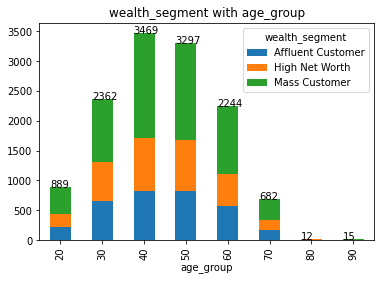

In [26]:
# Wealth and age
plot_stack_bar_seg(df_allmerge,'age_group','wealth_segment')

<Figure size 1152x648 with 0 Axes>

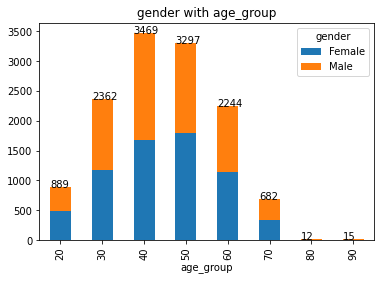

In [27]:
# Gender and age
plot_stack_bar_seg(df_allmerge,'age_group','gender')

<Figure size 1152x648 with 0 Axes>

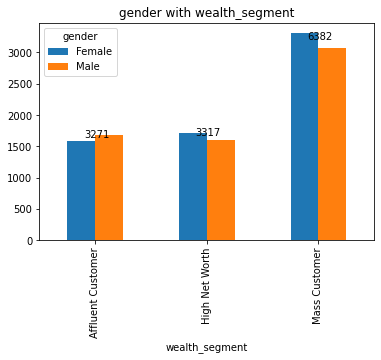

In [28]:
# Wealth and gender
plot_bar_seg(df_allmerge,'wealth_segment','gender')

<Figure size 1152x648 with 0 Axes>

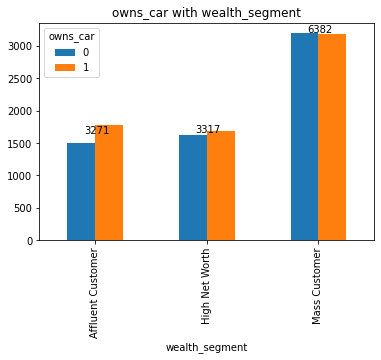

In [29]:
# Wealth and car
plot_bar_seg(df_allmerge,'wealth_segment','owns_car')

<Figure size 1152x648 with 0 Axes>

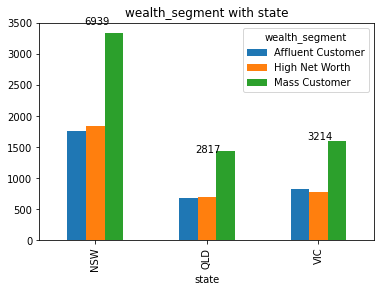

In [30]:
# State and wealth
plot_bar_seg(df_allmerge,'state','wealth_segment')

<Figure size 1152x648 with 0 Axes>

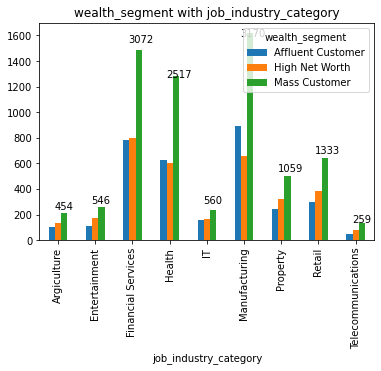

In [31]:
# Wealth and industry
plot_bar_seg(df_allmerge,'job_industry_category','wealth_segment')

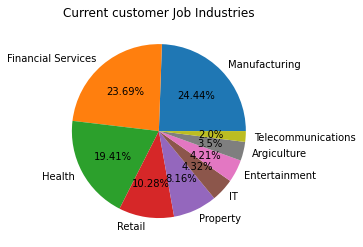

In [32]:
# Pie chart of job industries
df_allmerge['job_industry_category'].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Current customer Job Industries')
plt.ylabel('')
plt.show()

### New customer visualization

<Figure size 1152x648 with 0 Axes>

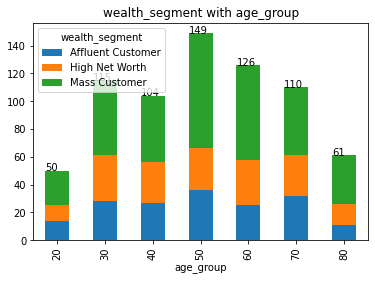

In [33]:
# Wealth and age
plot_stack_bar_seg(df_newcus_clean,'age_group','wealth_segment')

<Figure size 1152x648 with 0 Axes>

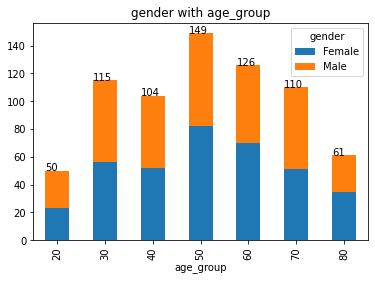

In [34]:
# Gender and age
plot_stack_bar_seg(df_newcus_clean,'age_group','gender')

<Figure size 1152x648 with 0 Axes>

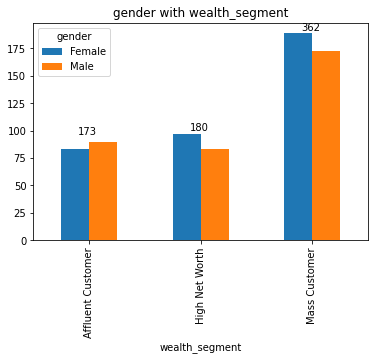

In [35]:
# Wealth and gender
plot_bar_seg(df_newcus_clean,'wealth_segment','gender')

<Figure size 1152x648 with 0 Axes>

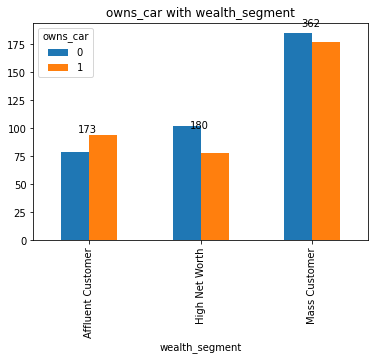

In [36]:
# Wealth and car
plot_bar_seg(df_newcus_clean,'wealth_segment','owns_car')

<Figure size 1152x648 with 0 Axes>

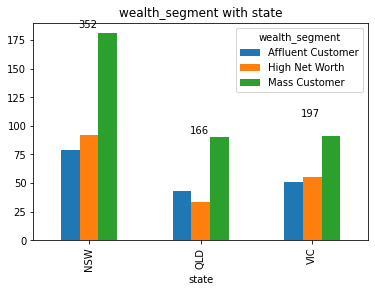

In [37]:
# State and wealth
plot_bar_seg(df_newcus_clean,'state','wealth_segment')

<Figure size 1152x648 with 0 Axes>

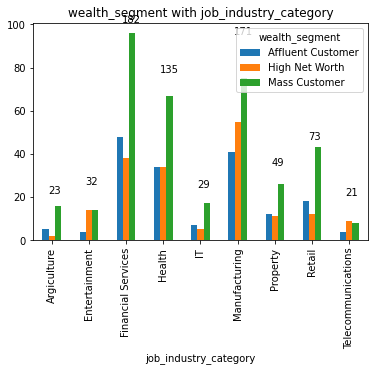

In [38]:
# Wealth and industry
plot_bar_seg(df_newcus_clean,'job_industry_category','wealth_segment')

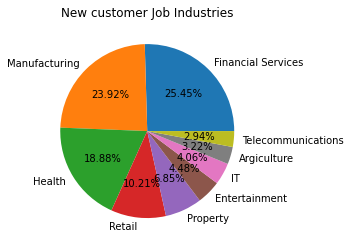

In [39]:
# Pie chart of job industries
df_newcus_clean['job_industry_category'].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New customer Job Industries')
plt.ylabel('')
plt.show()

### Correlation

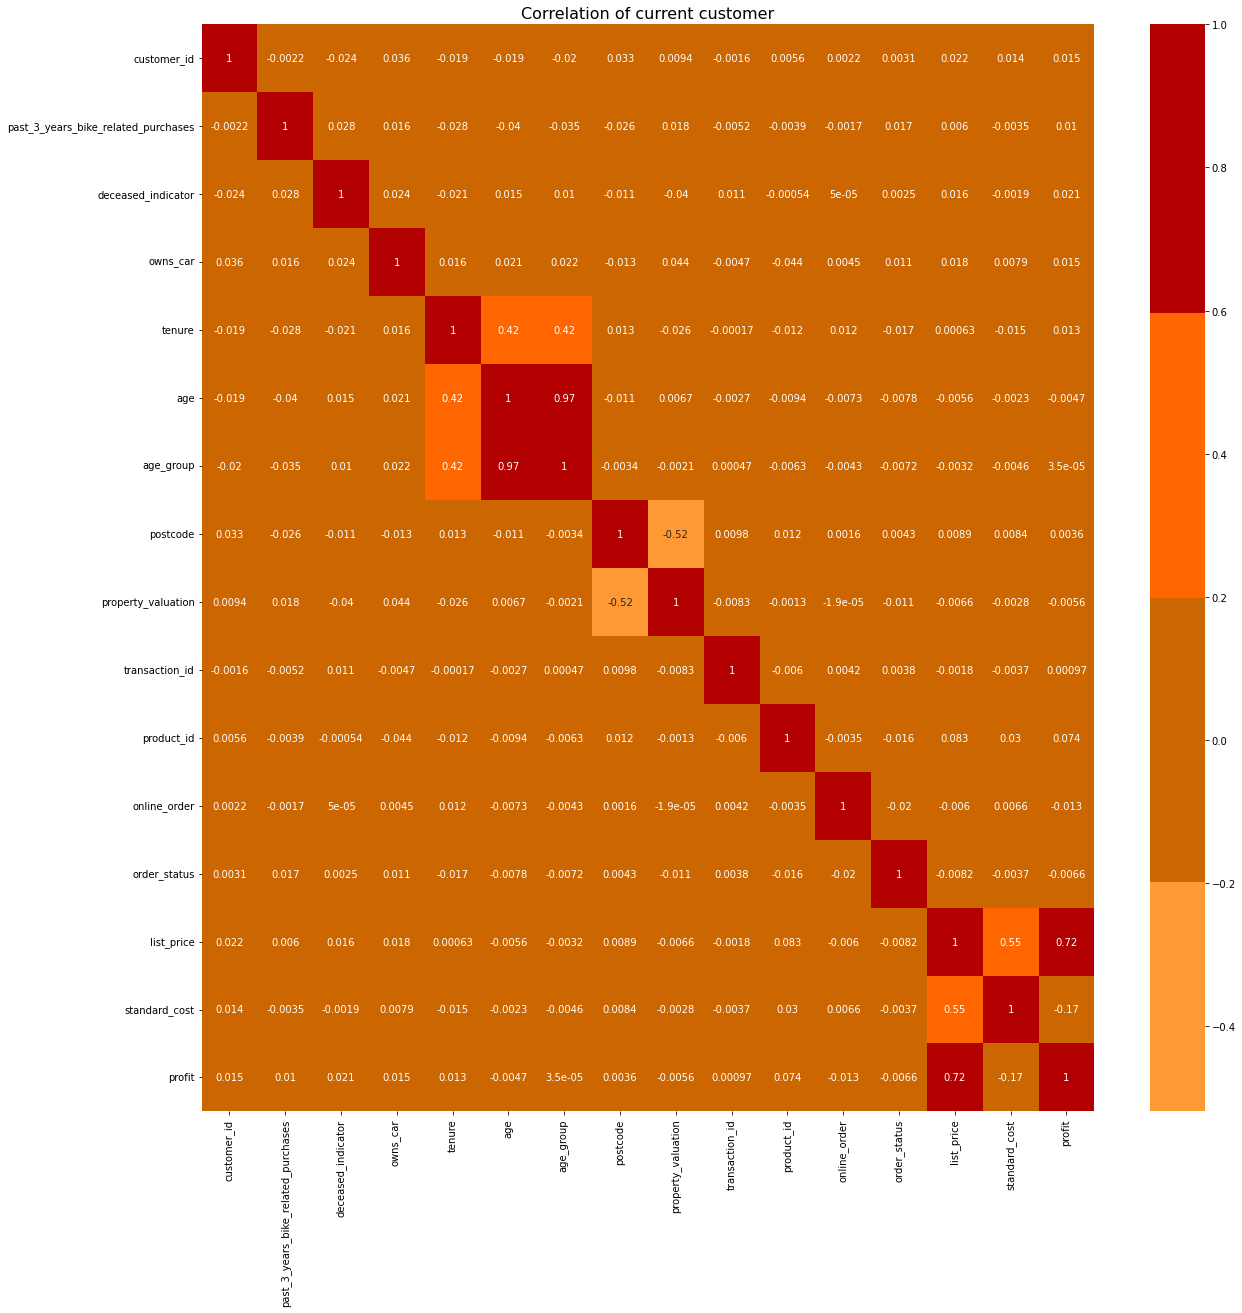

In [40]:
#correlation matrix
from matplotlib import colors
cmap = colors.ListedColormap(["#FFCC66", "#FF9933", "#CC6600", "#FF6600", "#B30000"])
correlation = df_allmerge.corr()
f, ax = plt.subplots(figsize=(20,20))
plt.title('Correlation of current customer', size=16)
sns.heatmap(correlation,annot=True, cmap=cmap, center=0)
plt.show()

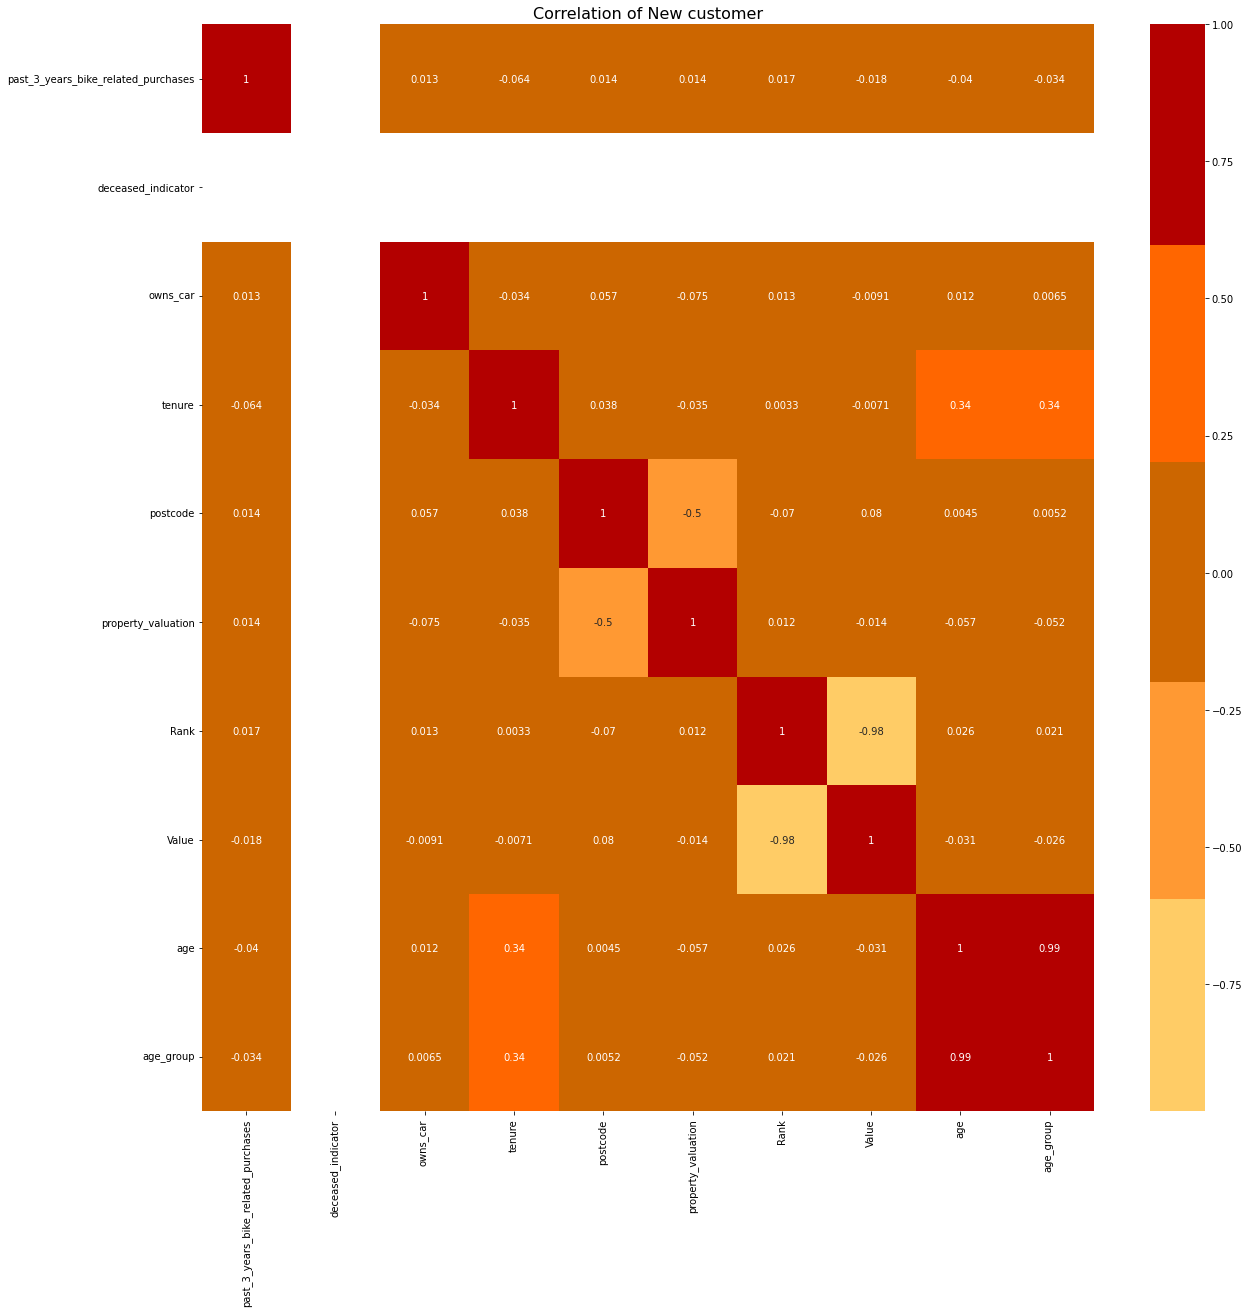

In [41]:
cmap = colors.ListedColormap(["#FFCC66", "#FF9933", "#CC6600", "#FF6600", "#B30000"])
correlation = df_newcus_clean.corr()
f, ax = plt.subplots(figsize=(20,20))
plt.title('Correlation of New customer', size=16)
sns.heatmap(correlation,annot=True, cmap=cmap, center=0)
plt.show()

In [43]:
# Save file to excel
#df_newcus_clean.to_excel('newcustomerclean.xlsx',index = None,header = True)
#df_allmerge.to_excel('All_merge.xlsx',index = None,header = True)

---
## Modelling

In [42]:
# Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

## TODO
1.Learn and applied RFM using ML